In [17]:

import pandas as pd

from os import path

# Performs logic with results of Annotree queries

Current logic -- organisms with rubisco and any recognizable sbpase have the CBB cycle (operationally speaking). 

Organisms with the csos2 and carboxysome shell genes have a CCM. This is only the alpha CCM for now. TODO: add beta logic. Would be curious to see beta outside the cyanos, for example. 

For FDH, H2ase and N2ase we are just looking for the focal enzymes, not the cofactor synthesis. Could add this. 

TODO: consider adding sugar transporters to the list to mark facultative heterotrophy. 

In [18]:
basedir = '../output/annotree/annotree_files'


queries_df = pd.read_csv(path.join(basedir, 'queries.csv'), index_col=0)
queries_df

,query
name,
rubisco_LSU,K01601
rubisco_SSU,K01602
sbpase_bifuncI,K01086
sbpase_bifuncII,K11532
sbpaseI,K01100
sbpaseII,K22315
fdh,K00122
fdh_large,K00123
fd_h2ase,K00532


In [19]:
name = 'rubisco_LSU'
ko_SSU = queries_df.loc[name].query
fname = path.join(basedir, f'{name}.csv')
rub_large = pd.read_csv(fname, index_col=0)
rub_large['genome_id'] = rub_large['gtdbId'].str[3:]


name = 'rubisco_SSU'
ko_LSU = queries_df.loc[name].query
fname = path.join(basedir, f'{name}.csv')
rub_small = pd.read_csv(fname, index_col=0)
rub_small['genome_id'] = rub_small['gtdbId'].str[3:]

In [20]:
rub_genes = pd.concat([rub_large, rub_small])
rub_genes.to_csv('../output/annotree/check_df/rub_genes.csv')

# retain only those groups with an LSU and SSU
rub_genes = rub_genes.groupby('genome_id').filter(
    lambda x: ko_LSU in x['keggId'].values and ko_SSU in x['keggId'].values).reset_index()

# has a large and small subunit
has_rub = rub_genes['genome_id'].unique()

print(f'Found {len(has_rub)} genomes with rubisco LSU and SSU')

Found 2006 genomes with rubisco LSU and SSU


In [21]:
sbpase_names = 'sbpase_bifuncI sbpase_bifuncII sbpaseI sbpaseII'.split()
all_sbpase_dfs = []
for sbpase in sbpase_names:
    print(sbpase)
    ko = queries_df.loc[sbpase].query
    fname = path.join(basedir, f'{sbpase}.csv')
    if not path.exists(fname):
        continue
    sbpase_df = pd.read_csv(fname, index_col=0)
    sbpase_df['genome_id'] = sbpase_df['gtdbId'].str[3:]
    all_sbpase_dfs.append(sbpase_df)



# list those genomes with any sbpase gene
all_sbpase_df = pd.concat(all_sbpase_dfs)
has_sbpase = all_sbpase_df['genome_id'].unique()
print(f'Genomes with sbpase: {len(has_sbpase)}')
all_sbpase_df.to_csv('../output/annotree/check_df/all_sbpase_df.csv')

sbpase_bifuncI
sbpase_bifuncII
sbpaseI
sbpaseII
Genomes with sbpase: 8272


In [22]:
fdh_names = 'fdh fdh_large'.split()
all_fdh_dfs = []
for fdh in fdh_names:
    ko = queries_df.loc[fdh].query
    fname = path.join(basedir, f'{fdh}.csv')
    if not path.exists(fname):
        continue
    fdh_df = pd.read_csv(fname, index_col=0)
    fdh_df['genome_id'] = fdh_df['gtdbId'].str[3:]
    all_fdh_dfs.append(fdh_df)

# list those genomes with any fdh gene
all_fdh_df = pd.concat(all_fdh_dfs)
has_fdh = all_fdh_df['genome_id'].unique()
all_fdh_df.to_csv('../output/annotree/check_df/all_fdh_df.csv')

In [23]:
h2ase_names = [n for n in queries_df.index if 'h2ase' in n]
print(h2ase_names)

all_h2ase_dfs = []
for h2ase in h2ase_names:
    ko = queries_df.loc[h2ase].query
    fname = path.join(basedir, f'{h2ase}.csv')
    if not path.exists(fname):
        continue
    h2ase_df = pd.read_csv(fname, index_col=0)
    h2ase_df['genome_id'] = h2ase_df['gtdbId'].str[3:]
    all_h2ase_dfs.append(h2ase_df)

# list those genomes with any h2ase gene
# TODO: some combinatorial logic here for subunits
all_h2ase_df = pd.concat(all_h2ase_dfs)
has_h2ase = all_h2ase_df['genome_id'].unique()

['fd_h2ase', 'fd_h2ase_large', 'membrane_h2ase_alpha', 'membrane_h2ase_beta', 'hoxK_h2ase_small', 'hoxG_h2ase_large', 'hoxZ_h2ase_cyt', 'hoxY_h2ase_small', 'hoxH_h2ase_large', 'hoxU_nife_h2ase_small', 'hoxF_nife_h2ase_large']


In [24]:
# got 0 hits on this one 
name = 'meoh_dehydrogenase'
ko = queries_df.loc[name].query
fname = path.join(basedir, f'{name}.csv')

if path.exists(fname):
    meoh_df = pd.read_csv(fname, index_col=0)
    meoh_df['genome_id'] = meoh_df['gtdbId'].str[3:]
    has_meoh = meoh_df['genome_id'].unique()
    print(f'Genomes with {name}: {len(has_meoh)}')
else:
    print(f'No file found for {name}, skipping.')
    has_meoh = []
    
meoh_df.to_csv('../output/annotree/check_df/meoh_df.csv')

Genomes with meoh_dehydrogenase: 1044


In [25]:
n2ase_names = 'n2ase_delta n2ase_femo_alpha n2ase_femo_beta'.split()
all_n2ase_dfs = []
for n2ase in n2ase_names:
    ko = queries_df.loc[n2ase].query
    fname = path.join(basedir, f'{n2ase}.csv')
    if not path.exists(fname):
        continue
    n2ase_df = pd.read_csv(fname, index_col=0)
    n2ase_df['genome_id'] = n2ase_df['gtdbId'].str[3:]
    all_n2ase_dfs.append(n2ase_df)

# list those genomes with any n2ase gene
all_n2ase_df = pd.concat(all_n2ase_dfs)
has_n2ase = all_n2ase_df['genome_id'].unique()

In [26]:
basedir = '../output/annotree/annotree_files'
queries_df = pd.read_csv(path.join(basedir, 'pfam_queries.csv'), index_col=0)
queries_df

,query
name,
BMC_domain,PF00936
Csos2,PF12288


In [27]:
name = 'BMC_domain'
pfam = queries_df.loc[name].query
fname = path.join(basedir, f'{name}.csv')
bmc_df = pd.read_csv(fname, index_col=0)
bmc_df['genome_id'] = bmc_df['gtdbId'].str[3:]
bmc_df.to_csv('../output/annotree/check_df/bmc_df.csv')

has_bmc = bmc_df['genome_id'].unique()

name = 'Csos2'
pfam = queries_df.loc[name].query
fname = path.join(basedir, f'{name}.csv')
csos2_df = pd.read_csv(fname, index_col=0)
csos2_df['genome_id'] = csos2_df['gtdbId'].str[3:]

has_csos2 = csos2_df['genome_id'].unique()
csos2_df.to_csv('../output/annotree/check_df/csos2_df.csv')

In [28]:
lists_of_genome_ids = [has_rub, has_sbpase, has_fdh, has_h2ase, has_n2ase, has_bmc, has_csos2]
all_genome_ids = set.union(*map(set, lists_of_genome_ids))
all_genome_ids = list(sorted(all_genome_ids))

# make a master dataframe containing T/F for each of the features
df = pd.DataFrame(dict(genome_id=all_genome_ids))

# Relevant Electron Donors
df['fdh'] = df.genome_id.isin(has_fdh)
df['h2ase'] = df.genome_id.isin(has_h2ase) 
df['meoh'] = df.genome_id.isin(has_meoh)

df['n2ase'] = df.genome_id.isin(has_n2ase)

# df['knallgas'] = df['rubisco'] & df['h2ase']

#ADDITIONAL GENE FEATURES ---

#CCM - TODO: add beta csome 
df['bmc'] = df.genome_id.isin(has_bmc)
df['csos2'] = df.genome_id.isin(has_csos2)
df['alpha_csome'] = df['csos2'] & df['bmc']
df['csome'] = df['alpha_csome']
#Nitrogen Fixation
df['n2ase'] = df.genome_id.isin(has_n2ase)


#Carbon Fixation Pathways
df['rubisco'] = df.genome_id.isin(has_rub)
df['sbpase'] = df.genome_id.isin(has_sbpase)
df['CBB'] = df['rubisco'] & df['sbpase']




# SYNTHESIS - IDENITIFYING GENOMES OF INTEREST
#1 Organism with 
df['CBB_csome'] = df['CBB'] & df['csome']
df['CBB_csome_n2ase'] = df['CBB_csome'] & df['n2ase']
df['CBB_csome_fdh'] = df['CBB_csome'] & df['fdh']
df['CBB_csome_h2ase'] = df['CBB_csome'] & df['h2ase']
df['CBB_csome_fdh_h2ase'] = df['CBB_csome'] & df['fdh'] & df['h2ase']

df.to_csv('../output/annotree/chemoauto_summary_annotree.csv', index=False)
len(df)


22921

In [ ]:
rownames = ['CBB_csome']
colnames = 'fdh,h2ase'.split(',')

contingency_table = pd.crosstab(df[rownames[0]], [df[c] for c in colnames],
                                rownames=rownames, colnames=colnames)
contingency_table.to_csv('../output/annotree/CCM_contingency_table.csv')
contingency_table


fdh       False       True       
h2ase     False True  False True 
CBB_csome                        
False      1481  4343  9958  6770
True         48   214    19    88

(np.int64(48), np.int64(9958), np.int64(4343), np.int64(19), np.int64(214), np.int64(6770), np.int64(88))


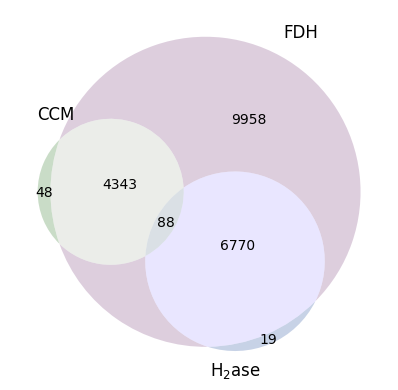

In [30]:
from matplotlib_venn import venn3, venn2
import matplotlib.pyplot as plt
import viz

colors = viz.color_palette()

# index is rubisco_csome, columns are fdh, h2ase
# hence subset order is rubisco_csome, fdh, h2ase
# Subsets are then Abc, aBc, abC, ABc, AbC, aBC, ABC
ct = contingency_table
subsets = (ct.loc[True][False, False], ct.loc[False][True, False], ct.loc[False][False, True],
              ct.loc[True][True, False], ct.loc[True][False, True], ct.loc[False][True, True],
              ct.loc[True][True, True])
print(subsets)

plt.figure()

my_colors = [colors['green'], colors['purple'], colors['blue']]
venn3(subsets=subsets, set_labels=('CCM', 'FDH', 'H$_2$ase'), set_colors=my_colors)
plt.savefig('../output/plots/annotree_venn.pdf')
plt.show()
